Importing necessary libraries and packages

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from keras.models import Sequential
from keras.layers import Conv2D, Lambda, MaxPooling2D # convolution layers
from keras.layers import Dense, Dropout, Flatten # core layers
from keras import layers

from keras.layers.normalization import BatchNormalization

from keras.preprocessing.image import ImageDataGenerator

from keras.utils.np_utils import to_categorical

Using TensorFlow backend.
C:\Users\lucif\Anaconda3\envs\TF\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\lucif\Anaconda3\envs\TF\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\lucif\Anaconda3\envs\TF\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\lucif\Anaconda3\envs\TF\lib\site-packages\tenso

In [2]:
import os
print(os.listdir('./Datasets'))

['4 category image', '7 day time series', 'aclImdb', 'calcofi.zip', 'compresive_strength_concrete.csv', 'CV dataset', 'data.csv', 'DEV', 'Devnagiri', 'dev_data.csv', 'Hitters.csv', 'Iris.csv', 'men-women-classification', 'mnist_test.csv', 'mnist_train.csv', 'mushrooms.csv', 'pulsar_stars.csv', 'Shark Tank Companies.csv', 'Sharktankpitchesdeals.csv', 'singapore-residents-by-age-group-ethnic-group-and-sex-end-june-annual.csv', 'Summary of Weather.csv', 'Synth_Credit_Card.csv', 'task', 'test.csv', 'train.csv', 'WE', 'Weather Station Locations.csv', 'weatherHistory.csv']


Importing the dataset

In [3]:
train = pd.read_csv('./Datasets/mnist_train.csv')
test = pd.read_csv('./Datasets/mnist_test.csv')
print("Data are Ready!!")

Data are Ready!!


In [4]:
print(f"Training data size is {train.shape}\nTesting data size is {test.shape}")

Training data size is (60000, 785)
Testing data size is (10000, 785)


In [5]:
test

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Separating dependent and independent variables

In [6]:
X = train.drop(['label'], 1).values
y = train['label'].values
test_y=test['label'].values
test_x = test.drop(['label'],1).values

In [7]:
X.shape

(60000, 784)

Normalizing

In [8]:
X = X / 255.0
test_x = test_x / 255.0

reshaping the data in the form of image for convolution layer(s)

In [9]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , channel = 1)
# channel = 1 => For gray scale
X = X.reshape(-1,28,28,1)
test_x = test_x.reshape(-1,28,28,1)

Encoding labels for training

In [10]:
# Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
y = to_categorical(y)

print(f"Label size {y.shape}")

Label size (60000, 10)


Splitting the data

In [11]:
# Split the train and the validation set for the fitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [12]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((54000, 28, 28, 1), (6000, 28, 28, 1), (54000, 10), (6000, 10))

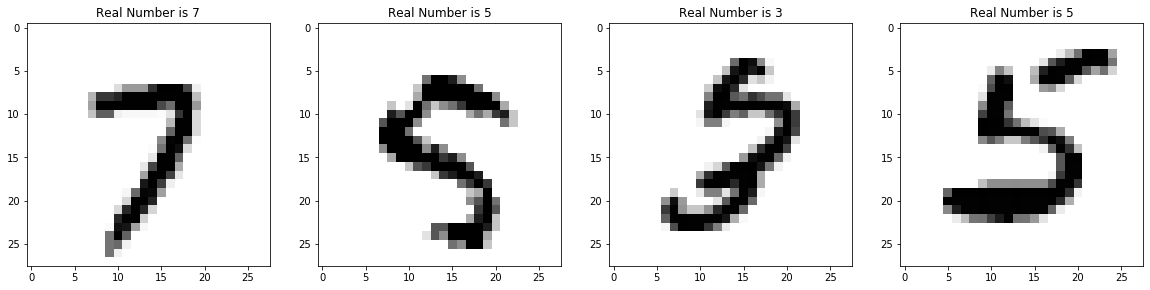

In [13]:
X_train__ = X_train.reshape(X_train.shape[0], 28, 28)

fig, axis = plt.subplots(1, 4, figsize=(20, 10))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_train__[i], cmap='binary')
    digit = y_train[i].argmax()
    ax.set(title = f"Real Number is {digit}");

In [14]:
mean = np.mean(X_train)
std = np.std(X_train)

def standardize(x):
    return (x-mean)/std

In [15]:
epochs = 1000
batch_size = 64

In [16]:
from keras import optimizers
from keras import callbacks

Creating model

In [17]:
model=Sequential()

model.add(Conv2D(4,(3,3),activation='relu',padding='valid',input_shape=(28,28,1)))
model.add(Conv2D(4,kernel_size=(3,3),activation='relu',padding='valid'))
model.add(Conv2D(5,kernel_size=(3,3),activation='relu',padding='valid'))
#model.add(MaxPooling2D((3,3),padding='same'))
model.add(layers.AveragePooling2D((3,3),strides=(2,2),padding='valid'))

model.add(Flatten())
model.add(Dense(15,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer='nadam',loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 4)         40        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 4)         148       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 5)         185       
_________________________________________________________________
average_pooling2d_1 (Average (None, 10, 10, 5)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 500)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 15)                7515      
_________________________________________________________________
dropout_1 (Dropout)          (None, 15)                0         
__________

Declaring callbacks

In [19]:
reduce_lr = callbacks.ReduceLROnPlateau(monitor='loss', 
                                        factor=0.1,
                                        patience=5, 
                                        min_lr=0.0000000002,
                                        verbose=1)

In [20]:
early= callbacks.EarlyStopping(monitor='val_acc',
                               min_delta=0.00001,
                               patience=50,
                               verbose=1,
                               mode='max',
                               baseline=0.99,
                               restore_best_weights=True)

Training

In [21]:
history=model.fit(X, y, batch_size=batch_size, validation_split=0.05, epochs=epochs,callbacks=[reduce_lr,early], shuffle=True)

Train on 57000 samples, validate on 3000 samples
Epoch 1/1000
57000/57000 [==============================] - 8s 134us/step - loss: 0.4470 - acc: 0.8560 - val_loss: 0.1146 - val_acc: 0.9683
Epoch 2/1000
57000/57000 [==============================] - 5s 93us/step - loss: 0.1977 - acc: 0.9389 - val_loss: 0.0890 - val_acc: 0.9750
Epoch 3/1000
57000/57000 [==============================] - 5s 93us/step - loss: 0.1619 - acc: 0.9494 - val_loss: 0.0857 - val_acc: 0.9757
Epoch 4/1000
57000/57000 [==============================] - 5s 92us/step - loss: 0.1404 - acc: 0.9568 - val_loss: 0.0674 - val_acc: 0.9810
Epoch 5/1000
57000/57000 [==============================] - 5s 92us/step - loss: 0.1220 - acc: 0.9623 - val_loss: 0.0603 - val_acc: 0.9843
Epoch 6/1000
57000/57000 [==============================] - 5s 93us/step - loss: 0.1095 - acc: 0.9656 - val_loss: 0.0523 - val_acc: 0.9860
Epoch 7/1000
57000/57000 [==============================] - 5s 93us/step - loss: 0.1041 - acc: 0.9676 - val_loss: 0.

Saving model architecture as image

In [22]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Plotting learning curve

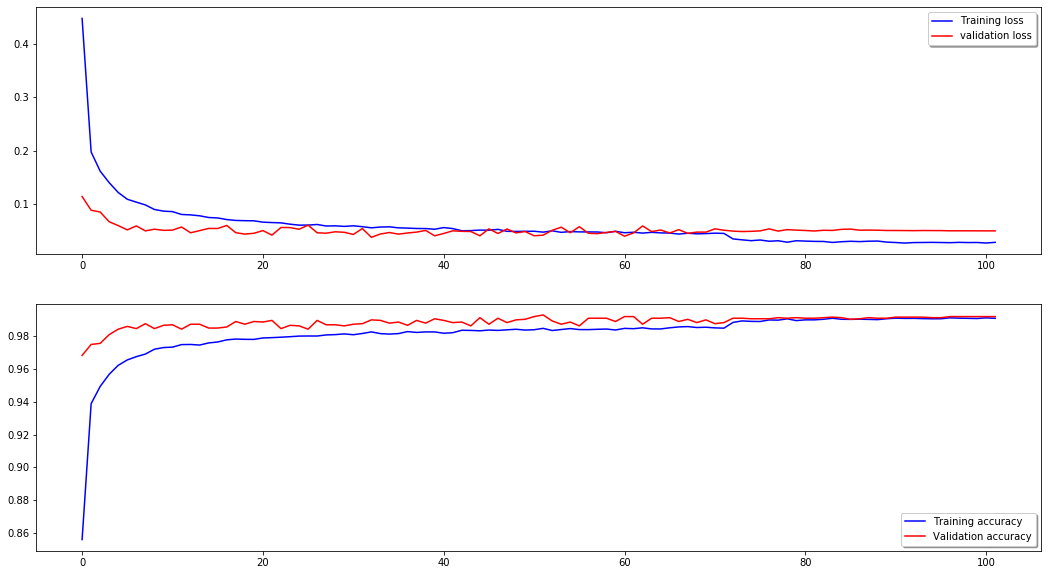

In [23]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1, figsize=(18, 10))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

Plotting confusion matrix

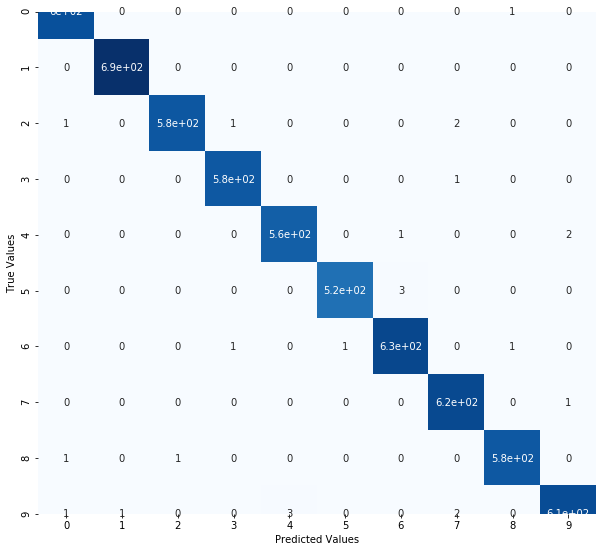

In [24]:
fig = plt.figure(figsize=(11,11)) # Set Figure

y_pred = model.predict(X_test) # Predict encoded label as 2 => [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

Y_pred = np.argmax(y_pred, 1) # Decode Predicted labels
Y_test = np.argmax(y_test, 1) # Decode labels

mat = confusion_matrix(Y_test, Y_pred) # Confusion matrix

# Plot Confusion matrix
sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues)
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

Visualising the prediction with real labels

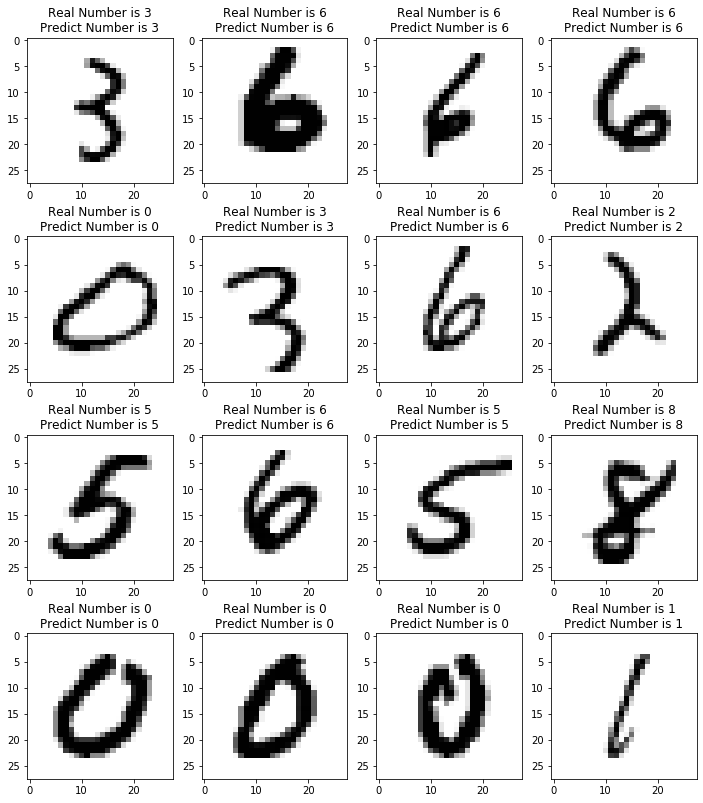

In [25]:
y_pred = model.predict(X_test)
X_test__ = X_test.reshape(X_test.shape[0], 28, 28)

fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_test__[i], cmap='binary')
    ax.set(title = f"Real Number is {y_test[i].argmax()}\nPredict Number is {y_pred[i].argmax()}");

Saving the model

In [27]:
model.save('./mnist.h5')

In [28]:
print('Max Validation Accuracy =',max(history.history['val_acc'])*100,'%')

Max Validation Accuracy = 99.3 %
